<a href="https://colab.research.google.com/github/TizianoBarbari/LaboratoryOfComputationalPhysics_Y3/blob/master/Big_data_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
6

6

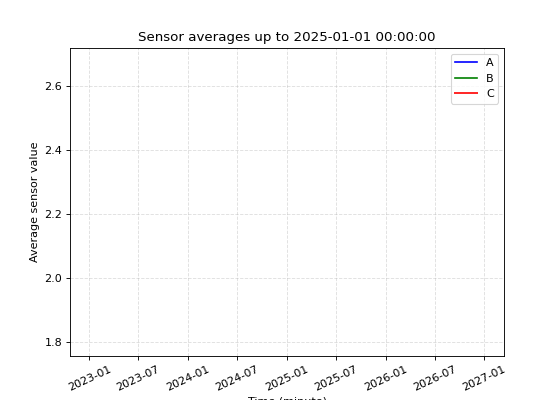

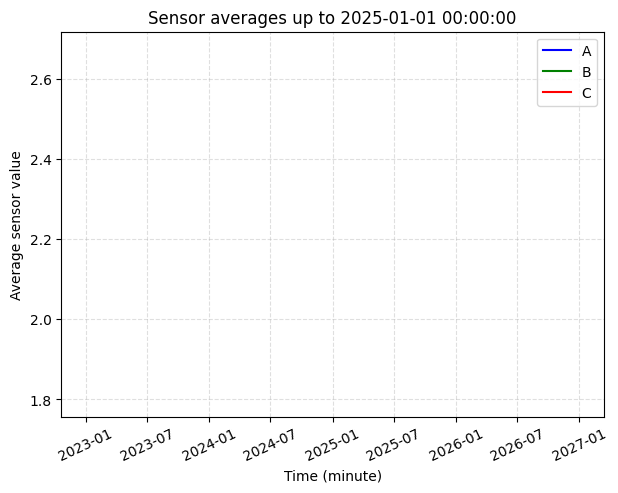

In [50]:
"""
Optimized Big Data simulation + animated visualization with Pandas and Matplotlib
Efficient version designed to handle up to ~1 million simulated sensor readings.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image

# --- Synthetic Big Data simulation ---
# Simulate 1 million readings from 3 sensors (A, B, C)
n = 10000
np.random.seed(42)  # for reproducibility

df = pd.DataFrame({
    "timestamp": pd.date_range("2025-01-01", periods=n, freq="s"),
    "sensor": np.random.choice(["A", "B", "C"], size=n),
    "value": np.random.randn(n).cumsum()
})

# --- Aggregate data per minute (much smaller and faster to plot) ---
df["minute"] = df["timestamp"].dt.floor("min")
agg = df.groupby(["minute", "sensor"], observed=True)["value"].mean().reset_index()

# Sort to ensure chronological order
agg = agg.sort_values("minute").reset_index(drop=True)

# --- Prepare animation data ---
# We will sample a subset of frames to make animation smoother and faster
unique_minutes = agg["minute"].unique()
frame_step = max(1, len(unique_minutes) // 200)  # at most 200 frames
sampled_minutes = unique_minutes[::frame_step]

# --- Matplotlib setup ---
fig, ax = plt.subplots(figsize=(7, 5))
colors = {"A": "blue", "B": "green", "C": "red"}

def update(frame):
    """Efficient update: only draw data up to current sampled minute."""
    ax.clear()
    current_time = sampled_minutes[frame]
    subset = agg[agg["minute"] <= current_time]

    for sensor in ["A", "B", "C"]:
        sub = subset[subset["sensor"] == sensor]
        ax.plot(sub["minute"], sub["value"], label=sensor, color=colors[sensor], linewidth=1.5)

    ax.legend()
    ax.set_title(f"Sensor averages up to {current_time}", fontsize=12)
    ax.set_xlabel("Time (minute)")
    ax.set_ylabel("Average sensor value")
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.tick_params(axis='x', labelrotation=25)

# --- Build animation ---
anim = FuncAnimation(fig, update, frames=len(sampled_minutes), interval=70, repeat=False)

# --- Choose ONE visualization method below ---

# 1️⃣ Save to file (recommended if dataset is large and you want to reuse the animation)
anim.save("animated_plot_bigdata.gif", writer="pillow", dpi=80)

# 2️⃣ Show interactively inside Colab/Jupyter (no file saved, faster display)
# HTML(anim.to_jshtml())

# 3️⃣ Display static final frame (for script execution)
# plt.show()

# --- Display saved GIF inline (works well in Colab/Jupyter) ---
Image(filename="animated_plot_bigdata.gif")